In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/IS_LR3')

In [ ]:
# импорт модулей
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None,
                          f_name=None,):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    percent:       If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html

    title:         Title for the heatmap. Default is None.

    f_name:        Filename for saving picture. Default is None, which means no saving.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories,annot_kws={"size": 20})

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

    if title:
        plt.title(title)

    if f_name:
        plt.savefig(fname = f_name, dpi=None, facecolor='w', edgecolor='w', orientation='portrait', pad_inches=0.1)

In [ ]:
# загрузка датасета
(X_train, y_train),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# создание своего разбиения датасета
from sklearn.model_selection import train_test_split
# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, train_size = 60000, random_state = 3)

# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (60000, 28, 28)
Shape of y train: (60000,)
Shape of X test: (10000, 28, 28)
Shape of y test: (10000,)


In [ ]:
# Зададим параметры данных и модели
num_classes = 10
input_shape = (28, 28, 1)
# Приведение входных данных к диапазону [0, 1]
X_train = X_train / 255
X_test = X_test / 255
# Расширяем размерность входных данных, чтобы каждое изображение имело
# размерность (высота, ширина, количество каналов)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X test:', X_test.shape)
# переведем метки в one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y test:', y_test.shape)

Shape of transformed X train: (60000, 28, 28, 1)
Shape of transformed X test: (10000, 28, 28, 1)
Shape of transformed y train: (60000, 10)
Shape of transformed y test: (10000, 10)


In [ ]:
# создаем модель
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [ ]:
# компилируем и обучаем модель
batch_size = 128
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 47s 110ms/step - loss: 0.3589 - accuracy: 0.8922 - val_loss: 0.1001 - val_accuracy: 0.9723
Epoch 2/15
422/422 [==============================] - 46s 109ms/step - loss: 0.1093 - accuracy: 0.9668 - val_loss: 0.0696 - val_accuracy: 0.9788
Epoch 3/15
422/422 [==============================] - 46s 109ms/step - loss: 0.0794 - accuracy: 0.9758 - val_loss: 0.0568 - val_accuracy: 0.9813
Epoch 4/15
422/422 [==============================] - 46s 109ms/step - loss: 0.0669 - accuracy: 0.9791 - val_loss: 0.0473 - val_accuracy: 0.9838
Epoch 5/15
422/422 [==============================] - 47s 111ms/step - loss: 0.0604 - accuracy: 0.9808 - val_loss: 0.0406 - val_accuracy: 0.9873
Epoch 6/15
422/422 [==============================] - 47s 111ms/step - loss: 0.0526 - accuracy: 0.9831 - val_loss: 0.0367 - val_accuracy: 0.9883
Epoch 7/15
422/422 [==============================] - 47s 111ms/step - loss: 0.0473 - accuracy: 0.9852 - val_loss: 0.0341 - val_ac

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 [==============================] - 4s 11ms/step - loss: 0.0328 - accuracy: 0.9914
Loss on test data: 0.03275914117693901
Accuracy on test data: 0.9914000034332275


1/1 [==============================] - 0s 90ms/step
NN output: [[2.0113791e-06 9.1855152e-12 1.5139181e-08 7.0402850e-11 1.2472816e-05
  5.6633676e-10 9.9998260e-01 3.9350888e-12 2.8906547e-06 2.9653615e-09]
 [3.7685575e-09 1.0502667e-11 9.9999845e-01 1.3339969e-06 3.4461642e-10
  1.4778985e-12 6.1096370e-13 3.6839225e-08 1.9424492e-07 1.1864432e-11]]
NN output: [[2.0113791e-06 9.1855152e-12 1.5139181e-08 7.0402850e-11 1.2472816e-05
  5.6633676e-10 9.9998260e-01 3.9350888e-12 2.8906547e-06 2.9653615e-09]
 [3.7685575e-09 1.0502667e-11 9.9999845e-01 1.3339969e-06 3.4461642e-10
  1.4778985e-12 6.1096370e-13 3.6839225e-08 1.9424492e-07 1.1864432e-11]]


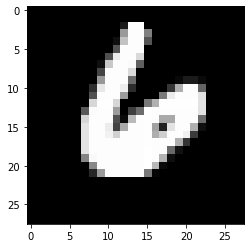

Real mark:  6
NN answer:  6
NN output: [[2.0113791e-06 9.1855152e-12 1.5139181e-08 7.0402850e-11 1.2472816e-05
  5.6633676e-10 9.9998260e-01 3.9350888e-12 2.8906547e-06 2.9653615e-09]
 [3.7685575e-09 1.0502667e-11 9.9999845e-01 1.3339969e-06 3.4461642e-10
  1.4778985e-12 6.1096370e-13 3.6839225e-08 1.9424492e-07 1.1864432e-11]]


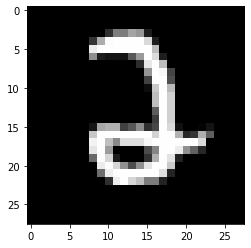

Real mark:  2
NN answer:  2


In [ ]:
# вывод тестового изображения и результата распознавания
n = 3
result = model.predict(X_test[n:n+2])
print('NN output:', result)
for i in range(2):
  print('NN output:', result)
  plt.imshow(X_test[n+i].reshape(28,28), cmap=plt.get_cmap('gray'))
  plt.show()
  print('Real mark: ', np.argmax(y_test[n+i]))
  print('NN answer: ', np.argmax(result[i]))

313/313 [==============================] - 8s 26ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1001
           1       0.99      1.00      1.00      1143
           2       0.99      0.99      0.99       987
           3       1.00      0.99      0.99      1023
           4       0.99      0.99      0.99       974
           5       0.99      0.99      0.99       907
           6       0.99      0.99      0.99       974
           7       0.99      0.99      0.99      1032
           8       0.99      0.99      0.99      1006
           9       0.99      0.99      0.99       953

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



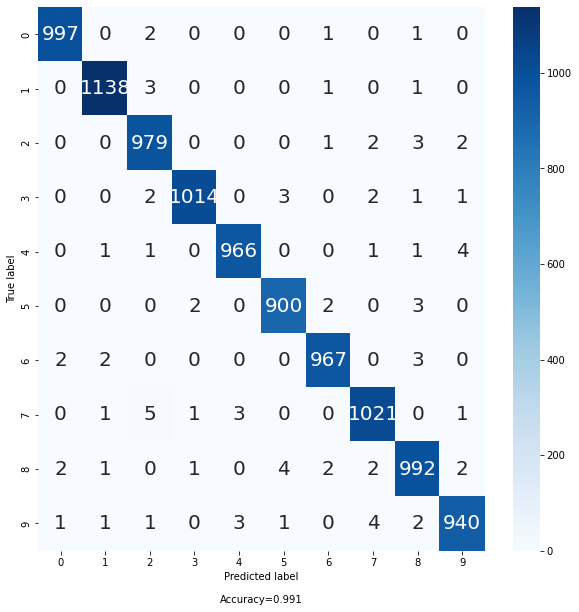

In [ ]:
# истинные метки классов
true_labels = np.argmax(y_test, axis=1)
# предсказанные метки классов
predicted_labels = np.argmax(model.predict(X_test), axis=1)
# отчет о качестве классификации
print(classification_report(true_labels, predicted_labels))
# вычисление матрицы ошибок
conf_matrix = confusion_matrix(true_labels, predicted_labels)
# красивая отрисовка матрицы ошибок в виде "тепловой карты"
make_confusion_matrix(conf_matrix, percent=False, figsize=(10,10))

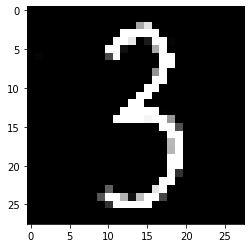

1/1 [==============================] - 0s 16ms/step
I think it's  3


In [ ]:
# загрузка собственного изображения
from PIL import Image
file_data = Image.open('/content/drive/MyDrive/Colab Notebooks/IS_LR3/test.png')
file_data = file_data.convert('L') # перевод в градации серого
test_img = np.array(file_data)
# вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()
# предобработка
test_img = test_img / 255
test_img = np.reshape(test_img, (1,28,28,1))
# распознавание
result = model.predict(test_img)
print('I think it\'s ', np.argmax(result))

In [ ]:
from keras.models import load_model
model_OLD = load_model('/content/drive/MyDrive/Colab Notebooks/model_LR1_best')
print(model_OLD.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               78500     
                                                                 
 dense_14 (Dense)            (None, 100)               10100     
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# загрузка датасета
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# создание своего разбиения датасета
from sklearn.model_selection import train_test_split
# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
k = 17
# разбиваем по вариантам
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000, train_size = 50000, random_state = 4*k-1)
# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

Shape of X train: (50000, 32, 32, 3)
Shape of y train: (50000, 1)
Shape of X test: (10000, 32, 32, 3)
Shape of y test: (10000, 1)


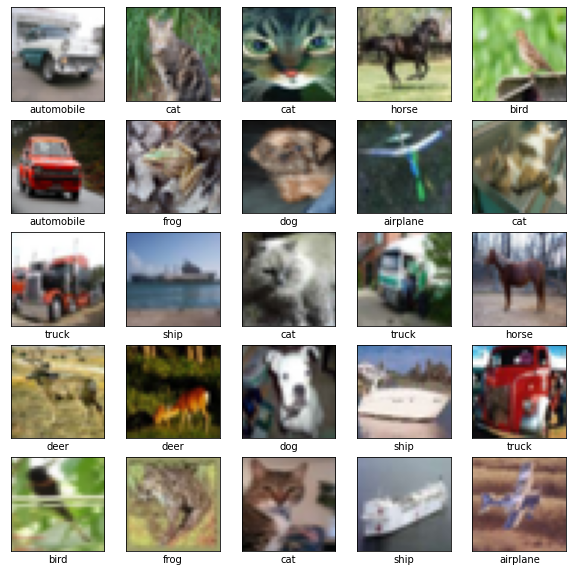

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(25):
 plt.subplot(5,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(X_train[i])
 plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
# Зададим параметры данных и модели
num_classes = 10
input_shape = (32, 32, 3)
# Приведение входных данных к диапазону [0, 1]
X_train = X_train / 255
X_test = X_test / 255
# Расширяем размерность входных данных, чтобы каждое изображение имело
# размерность (высота, ширина, количество каналов)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print('Shape of transformed X train:', X_train.shape)
print('Shape of transformed X test:', X_test.shape)
# переведем метки в one-hot
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('Shape of transformed y train:', y_train.shape)
print('Shape of transformed y test:', y_test.shape)

Shape of transformed X train: (50000, 32, 32, 3, 1)
Shape of transformed X test: (10000, 32, 32, 3, 1)
Shape of transformed y train: (50000, 10)
Shape of transformed y test: (10000, 10)


In [ ]:
# создаем модель
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 128)       

In [ ]:
# компилируем и обучаем модель
batch_size = 128
epochs = 15
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
352/352 [==============================] - 65s 182ms/step - loss: 1.8064 - accuracy: 0.3266 - val_loss: 1.4816 - val_accuracy: 0.4646
Epoch 2/15
352/352 [==============================] - 65s 184ms/step - loss: 1.4412 - accuracy: 0.4759 - val_loss: 1.3046 - val_accuracy: 0.5352
Epoch 3/15
352/352 [==============================] - 63s 179ms/step - loss: 1.2837 - accuracy: 0.5383 - val_loss: 1.2063 - val_accuracy: 0.5826
Epoch 4/15
352/352 [==============================] - 65s 184ms/step - loss: 1.1909 - accuracy: 0.5779 - val_loss: 1.0976 - val_accuracy: 0.6164
Epoch 5/15
352/352 [==============================] - 63s 179ms/step - loss: 1.1106 - accuracy: 0.6050 - val_loss: 1.0366 - val_accuracy: 0.6366
Epoch 6/15
352/352 [==============================] - 66s 186ms/step - loss: 1.0661 - accuracy: 0.6224 - val_loss: 1.0099 - val_accuracy: 0.6522
Epoch 7/15
352/352 [==============================] - 63s 180ms/step - loss: 1.0159 - accuracy: 0.6420 - val_loss: 0.9321 - val_ac

In [ ]:
# Оценка качества работы модели на тестовых данных
scores = model.evaluate(X_test, y_test)
print('Loss on test data:', scores[0])
print('Accuracy on test data:', scores[1])

313/313 [==============================] - 6s 21ms/step - loss: 0.8062 - accuracy: 0.7237
Loss on test data: 0.8061895966529846
Accuracy on test data: 0.7236999869346619


1/1 [==============================] - 0s 74ms/step
NN output: [[6.7777368e-03 5.2927500e-01 4.5329605e-05 5.7103694e-05 1.4550593e-05
  9.6285048e-06 2.7441758e-06 2.3905520e-04 7.3827868e-03 4.5619592e-01]
 [5.8490776e-05 1.4069623e-06 1.1249946e-02 6.4225737e-03 8.4134877e-01
  2.6204035e-02 1.2369992e-03 1.1346959e-01 3.6120359e-06 4.6221121e-06]
 [9.3432419e-02 1.0062506e-04 3.9530080e-03 1.7078489e-02 5.3326869e-01
  1.8429995e-02 6.1516788e-05 3.3145541e-01 4.3274955e-05 2.1764934e-03]]
NN output: [[6.7777368e-03 5.2927500e-01 4.5329605e-05 5.7103694e-05 1.4550593e-05
  9.6285048e-06 2.7441758e-06 2.3905520e-04 7.3827868e-03 4.5619592e-01]
 [5.8490776e-05 1.4069623e-06 1.1249946e-02 6.4225737e-03 8.4134877e-01
  2.6204035e-02 1.2369992e-03 1.1346959e-01 3.6120359e-06 4.6221121e-06]
 [9.3432419e-02 1.0062506e-04 3.9530080e-03 1.7078489e-02 5.3326869e-01
  1.8429995e-02 6.1516788e-05 3.3145541e-01 4.3274955e-05 2.1764934e-03]]


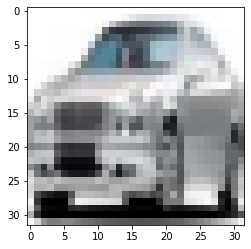

Real mark:  automobile
NN answer:  automobile
NN output: [[6.7777368e-03 5.2927500e-01 4.5329605e-05 5.7103694e-05 1.4550593e-05
  9.6285048e-06 2.7441758e-06 2.3905520e-04 7.3827868e-03 4.5619592e-01]
 [5.8490776e-05 1.4069623e-06 1.1249946e-02 6.4225737e-03 8.4134877e-01
  2.6204035e-02 1.2369992e-03 1.1346959e-01 3.6120359e-06 4.6221121e-06]
 [9.3432419e-02 1.0062506e-04 3.9530080e-03 1.7078489e-02 5.3326869e-01
  1.8429995e-02 6.1516788e-05 3.3145541e-01 4.3274955e-05 2.1764934e-03]]


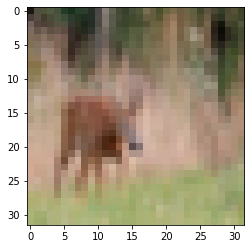

Real mark:  deer
NN answer:  deer


In [ ]:
# вывод тестового изображения и результата распознавания
n = 3
result = model.predict(X_test[n:n+3])
print('NN output:', result)
for i in range(2):
  print('NN output:', result)
  plt.imshow(X_test[n+i].reshape(32,32,3), cmap=plt.get_cmap('gray'))
  plt.show()
  print('Real mark: ', class_names[np.argmax(y_test[n+i])])
  print('NN answer: ', class_names[np.argmax(result[i])])

313/313 [==============================] - 7s 22ms/step
              precision    recall  f1-score   support

    airplane       0.75      0.76      0.75       945
  automobile       0.87      0.84      0.85       992
        bird       0.64      0.58      0.61      1037
         cat       0.60      0.53      0.56      1018
        deer       0.68      0.68      0.68      1016
         dog       0.62      0.63      0.62       971
        frog       0.86      0.70      0.77      1011
       horse       0.65      0.84      0.73      1037
        ship       0.84      0.83      0.83       967
       truck       0.76      0.87      0.81      1006

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



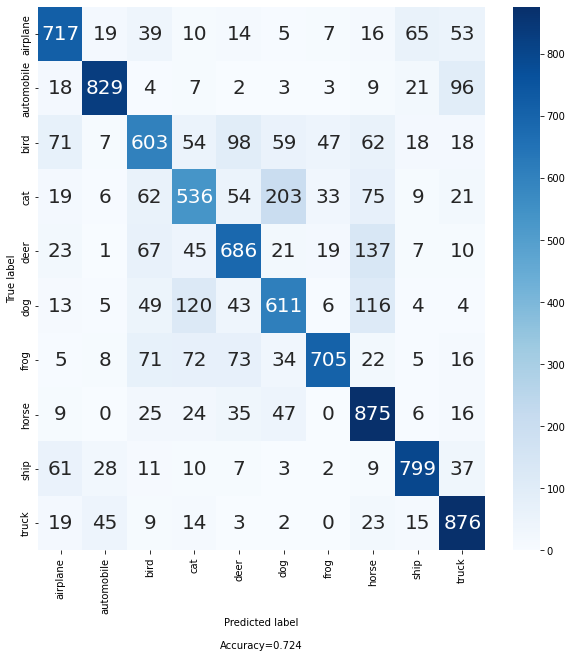

In [ ]:
# истинные метки классов
true_labels = np.argmax(y_test, axis=1)
# предсказанные метки классов
predicted_labels = np.argmax(model.predict(X_test), axis=1)
# отчет о качестве классификации
print(classification_report(true_labels, predicted_labels, target_names = class_names))
# вычисление матрицы ошибок
conf_matrix = confusion_matrix(true_labels, predicted_labels)
# красивая отрисовка матрицы ошибок в виде "тепловой карты"
make_confusion_matrix(conf_matrix, percent=False, figsize=(10,10), categories = class_names)